## Pandas Examples

**Pandas** is the premier data analysis library in Python:
- **DataFrames**: Powerful 2D labeled data structures (like spreadsheets)
- **Series**: 1D labeled arrays
- **Data I/O**: Read/write CSV, Excel, SQL, JSON, and more
- **Data manipulation**: Filter, sort, group, merge, reshape
- **Time series**: Specialized functionality for temporal data
- **Built on NumPy**: Fast and efficient

Pandas is essential for:
- Data cleaning and preparation
- Exploratory data analysis
- Statistical analysis
- Data visualization

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

# Random seed for reproducibility
np.random.seed(42)

print(f"Pandas version: {pd.__version__}")

Pandas version: 2.3.1


## Creating DataFrames and Series

### Series: 1D labeled array

In [2]:
# Create a Series from a list
temperatures = pd.Series([22.5, 24.1, 23.8, 21.9, 25.3], 
                        index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                        name='Temperature')

print("Temperature Series:")
print(temperatures)
print(f"\nMean temperature: {temperatures.mean():.2f}°C")
print(f"Max temperature: {temperatures.max():.2f}°C on {temperatures.idxmax()}")

Temperature Series:
Monday       22.5
Tuesday      24.1
Wednesday    23.8
Thursday     21.9
Friday       25.3
Name: Temperature, dtype: float64

Mean temperature: 23.52°C
Max temperature: 25.30°C on Friday


### DataFrame: 2D labeled data structure

In [3]:
# Create a DataFrame from a dictionary
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve'],
    'Age': [25, 30, 35, 28, 32],
    'City': ['New York', 'San Francisco', 'Los Angeles', 'Chicago', 'Boston'],
    'Salary': [70000, 85000, 75000, 90000, 82000]
}

df = pd.DataFrame(data)
print("Basic DataFrame:")
print(df)
print(f"\nShape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Basic DataFrame:
      Name  Age           City  Salary
0    Alice   25       New York   70000
1      Bob   30  San Francisco   85000
2  Charlie   35    Los Angeles   75000
3    Diana   28        Chicago   90000
4      Eve   32         Boston   82000

Shape: (5, 4)
Columns: ['Name', 'Age', 'City', 'Salary']


In [4]:
# DataFrame info and statistics
print("DataFrame Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   City    5 non-null      object
 3   Salary  5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 292.0+ bytes
None

Descriptive Statistics:
         Age    Salary
count   5.00      5.00
mean   30.00  80400.00
std     3.81   7956.13
min    25.00  70000.00
25%    28.00  75000.00
50%    30.00  82000.00
75%    32.00  85000.00
max    35.00  90000.00


## Data Selection and Indexing

Multiple ways to access data in a DataFrame:

In [5]:
# Select a single column (returns Series)
print("Ages:")
print(df['Age'])

# Select multiple columns (returns DataFrame)
print("\nNames and Salaries:")
print(df[['Name', 'Salary']])

Ages:
0    25
1    30
2    35
3    28
4    32
Name: Age, dtype: int64

Names and Salaries:
      Name  Salary
0    Alice   70000
1      Bob   85000
2  Charlie   75000
3    Diana   90000
4      Eve   82000


In [6]:
# Select rows by position with iloc
print("First two rows:")
print(df.iloc[0:2])

# Select rows by label with loc
print("\nRows 0 and 2:")
print(df.loc[[0, 2]])

# Select specific cells
print(f"\nBob's salary: ${df.loc[1, 'Salary']:,}")

First two rows:
    Name  Age           City  Salary
0  Alice   25       New York   70000
1    Bob   30  San Francisco   85000

Rows 0 and 2:
      Name  Age         City  Salary
0    Alice   25     New York   70000
2  Charlie   35  Los Angeles   75000

Bob's salary: $85,000


In [7]:
# Boolean indexing (filtering)
print("People with salary > $80,000:")
high_earners = df[df['Salary'] > 80000]
print(high_earners)

print("\nPeople aged 30+ in California cities:")
filtered = df[(df['Age'] >= 30) & (df['City'].isin(['San Francisco', 'Los Angeles']))]
print(filtered)

People with salary > $80,000:
    Name  Age           City  Salary
1    Bob   30  San Francisco   85000
3  Diana   28        Chicago   90000
4    Eve   32         Boston   82000

People aged 30+ in California cities:
      Name  Age           City  Salary
1      Bob   30  San Francisco   85000
2  Charlie   35    Los Angeles   75000


## Data Manipulation

### Adding and Modifying Columns

In [8]:
# Add new columns
df['Bonus'] = df['Salary'] * 0.1
df['Total_Compensation'] = df['Salary'] + df['Bonus']
df['Experience_Years'] = df['Age'] - 22  # Assuming college graduation at 22

print("DataFrame with new columns:")
print(df)

DataFrame with new columns:
      Name  Age           City  Salary   Bonus  Total_Compensation  \
0    Alice   25       New York   70000  7000.0             77000.0   
1      Bob   30  San Francisco   85000  8500.0             93500.0   
2  Charlie   35    Los Angeles   75000  7500.0             82500.0   
3    Diana   28        Chicago   90000  9000.0             99000.0   
4      Eve   32         Boston   82000  8200.0             90200.0   

   Experience_Years  
0                 3  
1                 8  
2                13  
3                 6  
4                10  


In [9]:
# Apply functions to columns
df['Salary_Category'] = df['Salary'].apply(lambda x: 'High' if x > 80000 else 'Medium' if x > 70000 else 'Low')

# Using map for simple replacements
city_region = {
    'New York': 'East',
    'San Francisco': 'West',
    'Los Angeles': 'West',
    'Chicago': 'Midwest',
    'Boston': 'East'
}
df['Region'] = df['City'].map(city_region)

print("DataFrame with categorical columns:")
print(df[['Name', 'City', 'Region', 'Salary', 'Salary_Category']])

DataFrame with categorical columns:
      Name           City   Region  Salary Salary_Category
0    Alice       New York     East   70000             Low
1      Bob  San Francisco     West   85000            High
2  Charlie    Los Angeles     West   75000          Medium
3    Diana        Chicago  Midwest   90000            High
4      Eve         Boston     East   82000            High


### Sorting and Ranking

In [10]:
# Sort by column
print("Sorted by Salary (descending):")
print(df.sort_values('Salary', ascending=False)[['Name', 'Salary']])

# Sort by multiple columns
print("\nSorted by Region, then Salary:")
print(df.sort_values(['Region', 'Salary'], ascending=[True, False])[['Name', 'Region', 'Salary']])

Sorted by Salary (descending):
      Name  Salary
3    Diana   90000
1      Bob   85000
4      Eve   82000
2  Charlie   75000
0    Alice   70000

Sorted by Region, then Salary:
      Name   Region  Salary
4      Eve     East   82000
0    Alice     East   70000
3    Diana  Midwest   90000
1      Bob     West   85000
2  Charlie     West   75000


### Grouping and Aggregation

In [11]:
# Group by Region
print("Statistics by Region:")
region_stats = df.groupby('Region').agg({
    'Salary': ['mean', 'min', 'max', 'count'],
    'Age': 'mean'
})
print(region_stats)

# Multiple aggregations
print("\nSalary Category Summary:")
category_summary = df.groupby('Salary_Category')['Salary'].describe()
print(category_summary)

Statistics by Region:
          Salary                       Age
            mean    min    max count  mean
Region                                    
East     76000.0  70000  82000     2  28.5
Midwest  90000.0  90000  90000     1  28.0
West     80000.0  75000  85000     2  32.5

Salary Category Summary:
                 count      mean      std      min      25%      50%      75%  \
Salary_Category                                                                 
High               3.0  85666.67  4041.45  82000.0  83500.0  85000.0  87500.0   
Low                1.0  70000.00      NaN  70000.0  70000.0  70000.0  70000.0   
Medium             1.0  75000.00      NaN  75000.0  75000.0  75000.0  75000.0   

                     max  
Salary_Category           
High             90000.0  
Low              70000.0  
Medium           75000.0  


## Real-World Dataset: Scientific Measurements

Let's create and analyze a realistic scientific dataset.

In [12]:
# Generate synthetic experimental data
n_samples = 200

# Create realistic scientific data
experiments = pd.DataFrame({
    'Sample_ID': [f'S{i:03d}' for i in range(n_samples)],
    'Treatment': np.random.choice(['Control', 'Drug_A', 'Drug_B', 'Drug_C'], n_samples),
    'Concentration': np.random.choice([0, 10, 50, 100], n_samples),  # μM
    'Temperature': np.random.normal(37, 0.5, n_samples),  # °C
    'pH': np.random.normal(7.4, 0.1, n_samples),
    'Response': np.random.normal(50, 15, n_samples),  # Some measurement
    'Time_hours': np.random.choice([1, 3, 6, 12, 24], n_samples),
    'Batch': np.random.choice(['Batch_1', 'Batch_2', 'Batch_3'], n_samples)
})

# Add treatment effect to Response
treatment_effects = {'Control': 0, 'Drug_A': 15, 'Drug_B': 25, 'Drug_C': 20}
experiments['Response'] += experiments['Treatment'].map(treatment_effects)
experiments['Response'] += experiments['Concentration'] * 0.2
experiments['Response'] = experiments['Response'].clip(lower=0)  # No negative responses

print("Experimental Dataset:")
print(experiments.head(10))
print(f"\nDataset shape: {experiments.shape}")

Experimental Dataset:
  Sample_ID Treatment  Concentration  Temperature    pH  Response  Time_hours  \
0      S000    Drug_B             50        36.66  7.49    102.52           1   
1      S001    Drug_C            100        37.12  7.38     93.82           6   
2      S002   Control             50        37.15  7.40     65.06           6   
3      S003    Drug_B              0        36.64  7.30     68.82           3   
4      S004    Drug_B            100        37.93  7.40     87.69          24   
5      S005    Drug_C              0        37.24  7.37     63.51           1   
6      S006   Control            100        36.40  7.43     75.92           3   
7      S007   Control            100        37.33  7.32     63.69          12   
8      S008    Drug_B             10        36.51  7.45     81.35          12   
9      S009    Drug_A              0        37.39  7.55     96.13           6   

     Batch  
0  Batch_1  
1  Batch_3  
2  Batch_1  
3  Batch_2  
4  Batch_2  
5  Batch

In [13]:
# Explore the dataset
print("Dataset Summary:")
print(experiments.describe())

print("\nTreatment counts:")
print(experiments['Treatment'].value_counts())

print("\nMissing values:")
print(experiments.isnull().sum())

Dataset Summary:
       Concentration  Temperature      pH  Response  Time_hours
count         200.00       200.00  200.00    200.00      200.00
mean           45.00        37.03    7.39     74.14        8.79
std            40.97         0.48    0.10     18.86        8.47
min             0.00        35.38    7.15     20.24        1.00
25%            10.00        36.67    7.32     62.08        3.00
50%            50.00        37.04    7.39     76.25        6.00
75%           100.00        37.33    7.46     87.81       12.00
max           100.00        38.93    7.71    113.60       24.00

Treatment counts:
Treatment
Drug_B     54
Drug_C     54
Control    46
Drug_A     46
Name: count, dtype: int64

Missing values:
Sample_ID        0
Treatment        0
Concentration    0
Temperature      0
pH               0
Response         0
Time_hours       0
Batch            0
dtype: int64


## Exploratory Data Analysis

### Statistical Analysis by Group

In [14]:
# Compare treatments
print("Response by Treatment:")
treatment_stats = experiments.groupby('Treatment')['Response'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(2)
print(treatment_stats)

# Response by concentration
print("\nResponse by Concentration:")
conc_stats = experiments.groupby('Concentration')['Response'].agg([
    'count', 'mean', 'std'
]).round(2)
print(conc_stats)

Response by Treatment:
           count   mean    std    min     max
Treatment                                    
Control       46  60.48  19.47  20.24  104.06
Drug_A        46  78.52  19.33  26.55  113.60
Drug_B        54  80.18  15.67  45.77  110.15
Drug_C        54  76.02  15.22  49.43  112.56

Response by Concentration:
               count   mean    std
Concentration                     
0                 49  63.14  16.79
10                40  68.48  19.04
50                50  77.73  18.23
100               61  83.75  14.92


In [15]:
# Cross-tabulation: Treatment vs Concentration
print("Mean Response by Treatment and Concentration:")
pivot = pd.pivot_table(experiments, 
                       values='Response', 
                       index='Treatment', 
                       columns='Concentration', 
                       aggfunc='mean')
print(pivot.round(2))

Mean Response by Treatment and Concentration:
Concentration    0      10     50     100
Treatment                                
Control        49.28  46.16  60.10  73.70
Drug_A         67.32  70.61  82.97  87.88
Drug_B         66.72  72.13  87.90  91.86
Drug_C         68.82  76.25  72.99  84.90


### Statistical Testing

In [16]:
# T-test: Compare Control vs Drug_A
control = experiments[experiments['Treatment'] == 'Control']['Response']
drug_a = experiments[experiments['Treatment'] == 'Drug_A']['Response']

t_stat, p_value = stats.ttest_ind(control, drug_a)

print("T-test: Control vs Drug_A")
print(f"  Control mean: {control.mean():.2f} ± {control.std():.2f}")
print(f"  Drug_A mean: {drug_a.mean():.2f} ± {drug_a.std():.2f}")
print(f"  t-statistic: {t_stat:.3f}")
print(f"  p-value: {p_value:.4f}")
print(f"  Significant at α=0.05: {'Yes' if p_value < 0.05 else 'No'}")

# ANOVA: Compare all treatments
groups = [experiments[experiments['Treatment'] == t]['Response'] 
          for t in experiments['Treatment'].unique()]
f_stat, p_value_anova = stats.f_oneway(*groups)

print(f"\nANOVA: All treatments")
print(f"  F-statistic: {f_stat:.3f}")
print(f"  p-value: {p_value_anova:.4f}")
print(f"  Significant difference between treatments: {'Yes' if p_value_anova < 0.05 else 'No'}")

T-test: Control vs Drug_A
  Control mean: 60.48 ± 19.47
  Drug_A mean: 78.52 ± 19.33
  t-statistic: -4.460
  p-value: 0.0000
  Significant at α=0.05: Yes

ANOVA: All treatments
  F-statistic: 12.841
  p-value: 0.0000
  Significant difference between treatments: Yes


### Correlation Analysis

Correlation Matrix:
               Temperature    pH  Concentration  Response  Time_hours
Temperature           1.00 -0.06          -0.06     -0.11        0.11
pH                   -0.06  1.00           0.07      0.11       -0.06
Concentration        -0.06  0.07           1.00      0.42        0.07
Response             -0.11  0.11           0.42      1.00        0.03
Time_hours            0.11 -0.06           0.07      0.03        1.00


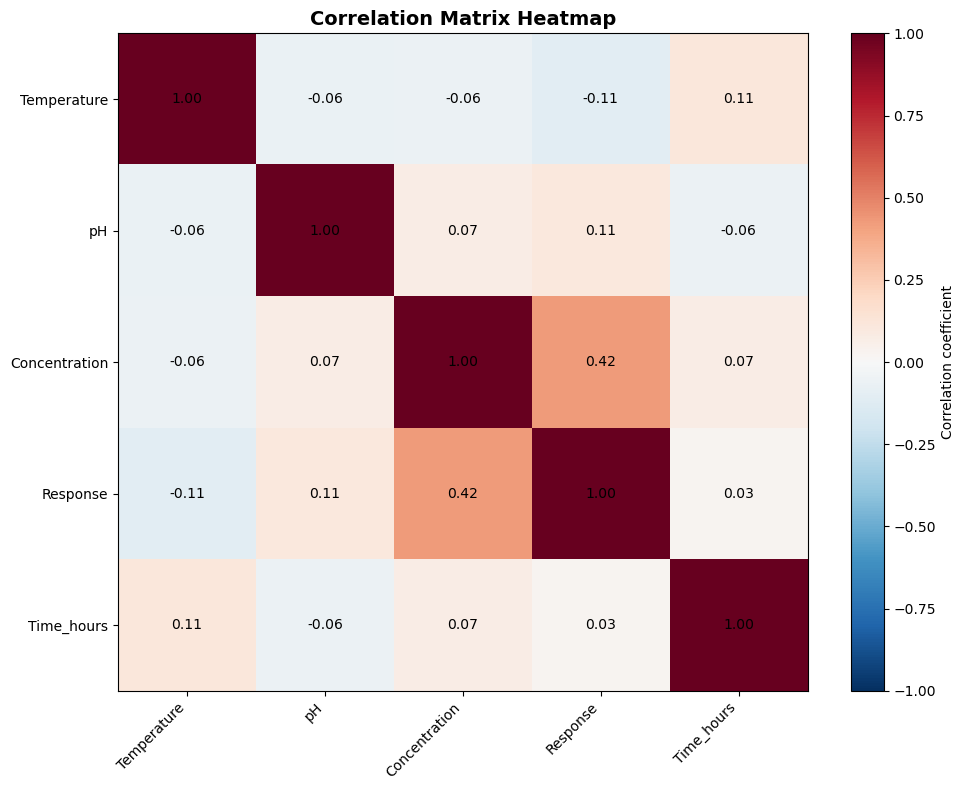

In [17]:
# Correlation matrix
print("Correlation Matrix:")
correlation = experiments[['Temperature', 'pH', 'Concentration', 'Response', 'Time_hours']].corr()
print(correlation.round(3))

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(label='Correlation coefficient')
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title('Correlation Matrix Heatmap', fontsize=14, fontweight='bold')

# Add correlation values to cells
for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        plt.text(j, i, f'{correlation.iloc[i, j]:.2f}', 
                ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

## Data Visualization with Pandas

Pandas has built-in plotting that works seamlessly with Matplotlib.

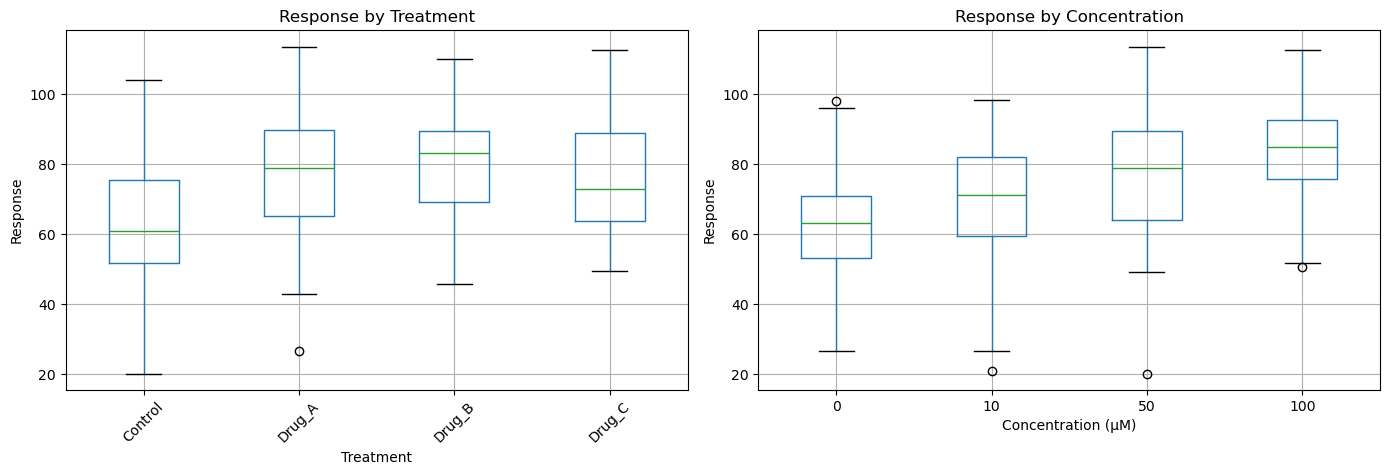

In [18]:
# Box plots by treatment
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

experiments.boxplot(column='Response', by='Treatment', ax=axes[0])
axes[0].set_title('Response by Treatment')
axes[0].set_xlabel('Treatment')
axes[0].set_ylabel('Response')
plt.sca(axes[0])
plt.xticks(rotation=45)

experiments.boxplot(column='Response', by='Concentration', ax=axes[1])
axes[1].set_title('Response by Concentration')
axes[1].set_xlabel('Concentration (μM)')
axes[1].set_ylabel('Response')

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

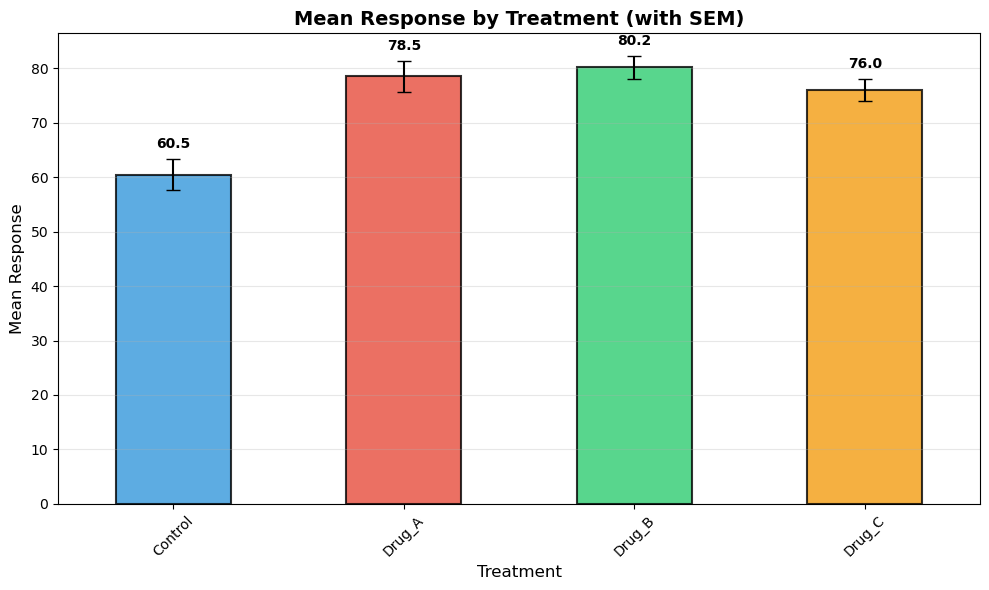

In [19]:
# Bar plot: Mean response by treatment with error bars
treatment_summary = experiments.groupby('Treatment')['Response'].agg(['mean', 'std', 'sem'])

fig, ax = plt.subplots(figsize=(10, 6))
treatment_summary['mean'].plot(kind='bar', ax=ax, color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'],
                                yerr=treatment_summary['sem'], capsize=5, alpha=0.8, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Treatment', fontsize=12)
ax.set_ylabel('Mean Response', fontsize=12)
ax.set_title('Mean Response by Treatment (with SEM)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)

# Add value labels
for i, (idx, row) in enumerate(treatment_summary.iterrows()):
    ax.text(i, row['mean'] + row['sem'] + 2, f"{row['mean']:.1f}", 
            ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

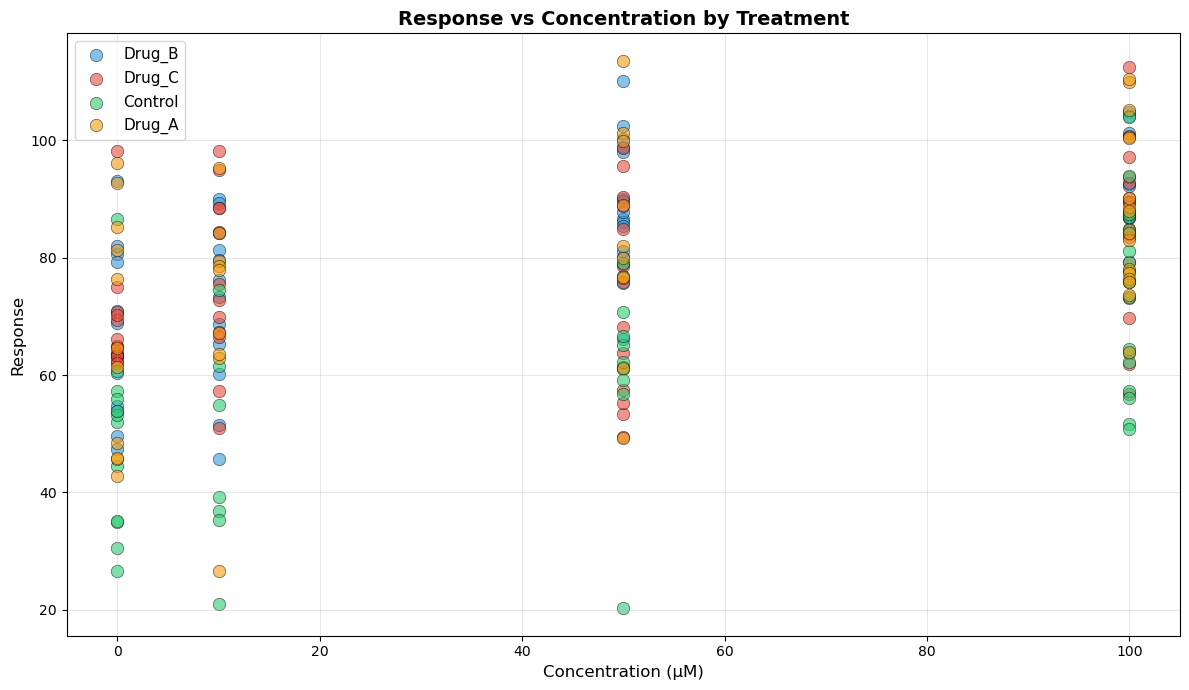

In [20]:
# Scatter plot: Response vs Concentration, colored by Treatment
fig, ax = plt.subplots(figsize=(12, 7))

treatments = experiments['Treatment'].unique()
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for treatment, color in zip(treatments, colors):
    subset = experiments[experiments['Treatment'] == treatment]
    ax.scatter(subset['Concentration'], subset['Response'], 
              label=treatment, alpha=0.6, s=80, color=color, edgecolors='black', linewidth=0.5)

ax.set_xlabel('Concentration (μM)', fontsize=12)
ax.set_ylabel('Response', fontsize=12)
ax.set_title('Response vs Concentration by Treatment', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Time Series Analysis

Create a time-based dataset and analyze trends.

In [21]:
# Create time series data
dates = pd.date_range(start='2025-01-01', end='2025-12-31', freq='D')
n_days = len(dates)

# Simulate seasonal sales data
trend = np.linspace(100, 150, n_days)  # Upward trend
seasonal = 30 * np.sin(2 * np.pi * np.arange(n_days) / 365)  # Annual seasonality
noise = np.random.randn(n_days) * 5
sales = trend + seasonal + noise

sales_data = pd.DataFrame({
    'Date': dates,
    'Sales': sales,
    'Day_of_Week': dates.day_name(),
    'Month': dates.month_name(),
    'Quarter': dates.quarter
})

# Set Date as index
sales_data.set_index('Date', inplace=True)

print("Time Series Data:")
print(sales_data.head(10))

Time Series Data:
             Sales Day_of_Week    Month  Quarter
Date                                            
2025-01-01  102.22   Wednesday  January        1
2025-01-02   95.68    Thursday  January        1
2025-01-03  105.76      Friday  January        1
2025-01-04   93.37    Saturday  January        1
2025-01-05  104.10      Sunday  January        1
2025-01-06  103.06      Monday  January        1
2025-01-07  103.32     Tuesday  January        1
2025-01-08   98.68   Wednesday  January        1
2025-01-09  100.53    Thursday  January        1
2025-01-10  113.96      Friday  January        1


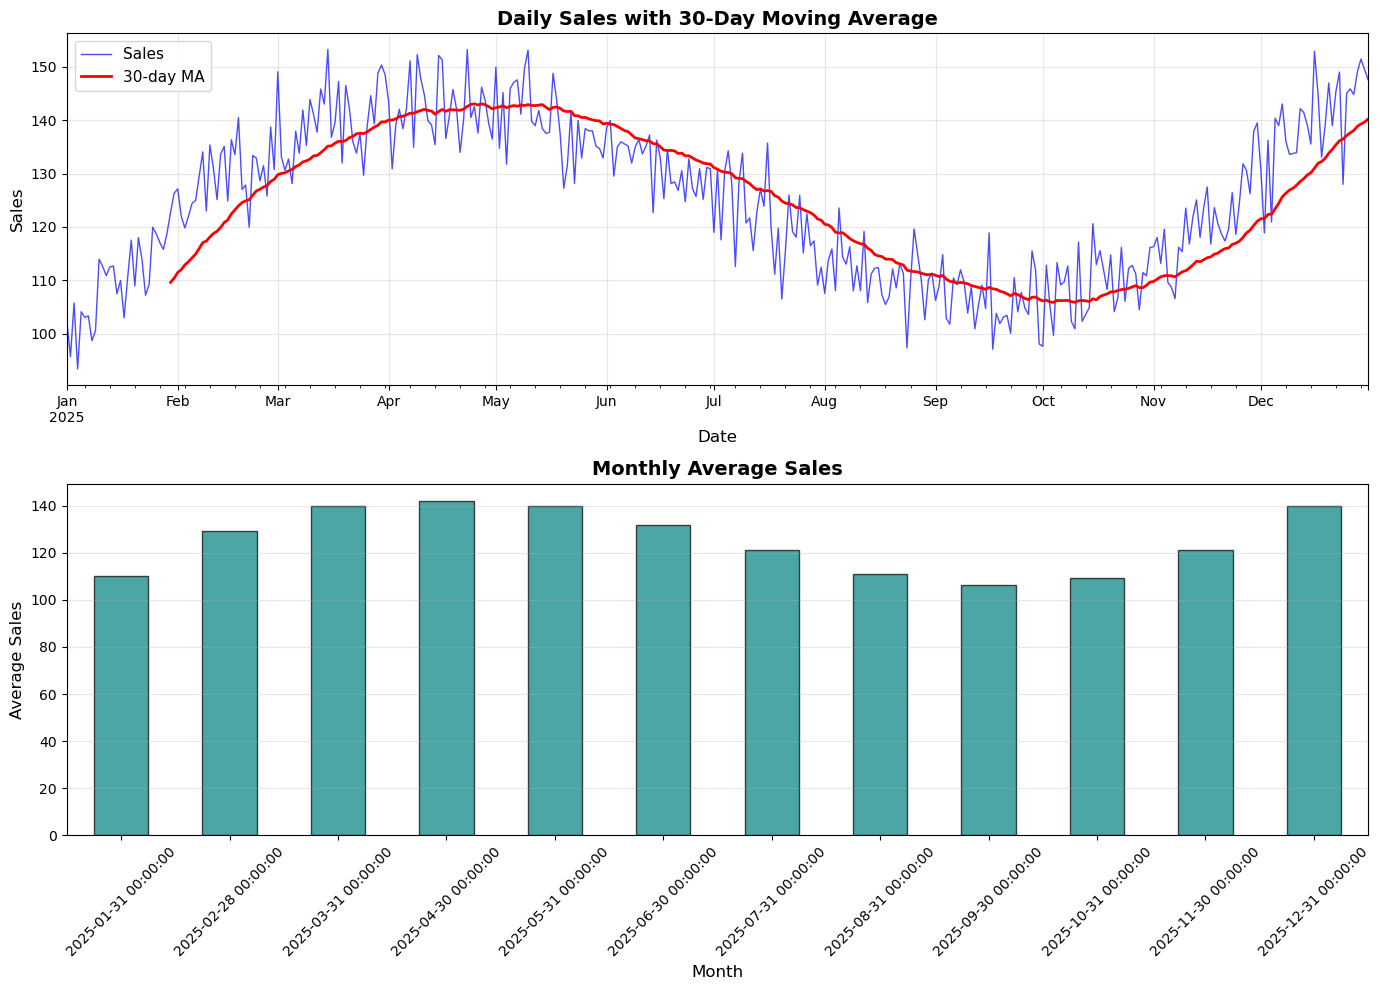


Monthly Statistics:
              mean      sum   std
Date                             
2025-01-31  110.14  3414.44  7.97
2025-02-28  129.24  3618.65  5.65
2025-03-31  139.98  4339.52  6.70
2025-04-30  142.14  4264.14  5.85
2025-05-31  139.65  4329.04  6.54
2025-06-30  131.78  3953.43  4.58
2025-07-31  121.19  3757.01  7.52
2025-08-31  111.05  3442.42  5.14
2025-09-30  106.42  3192.74  5.18
2025-10-31  109.27  3387.45  5.72
2025-11-30  121.06  3631.87  7.65
2025-12-31  139.89  4336.64  8.31


In [22]:
# Time series visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Daily sales
sales_data['Sales'].plot(ax=axes[0], linewidth=1, alpha=0.7, color='blue')
sales_data['Sales'].rolling(window=30).mean().plot(ax=axes[0], linewidth=2, color='red', label='30-day MA')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Sales', fontsize=12)
axes[0].set_title('Daily Sales with 30-Day Moving Average', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Monthly aggregation
monthly_sales = sales_data.resample('ME')['Sales'].agg(['mean', 'sum', 'std'])
monthly_sales['mean'].plot(kind='bar', ax=axes[1], color='teal', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Average Sales', fontsize=12)
axes[1].set_title('Monthly Average Sales', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\nMonthly Statistics:")
print(monthly_sales.round(2))

Sales by Day of Week:
               mean    std  count
Day_of_Week                      
Monday       124.91  14.67     52
Tuesday      126.06  14.19     52
Wednesday    124.71  14.92     53
Thursday     124.15  14.72     52
Friday       124.02  14.94     52
Saturday     126.27  15.67     52
Sunday       125.70  13.97     52


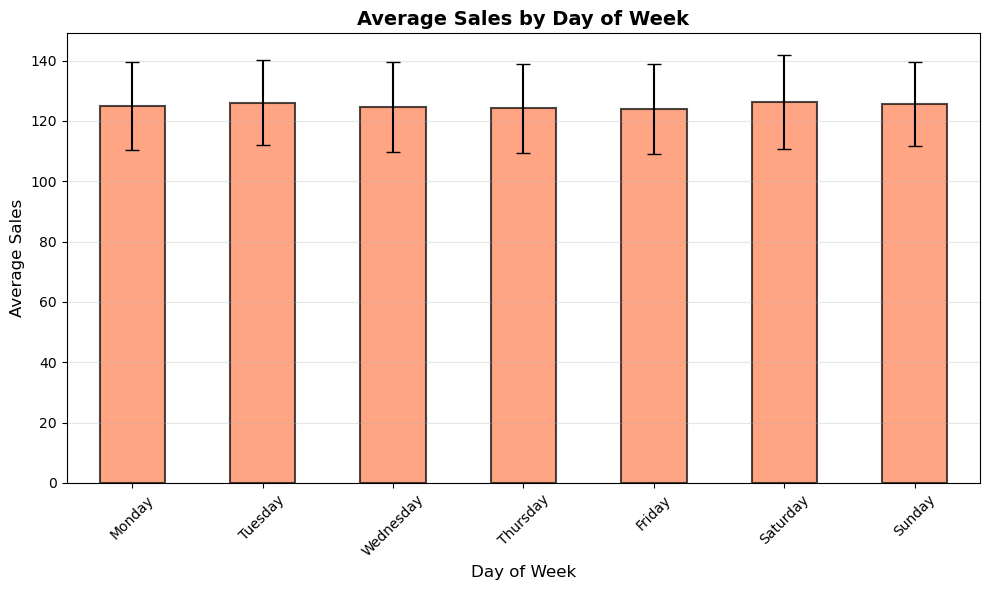

In [23]:
# Analyze by day of week
dow_sales = sales_data.groupby('Day_of_Week')['Sales'].agg(['mean', 'std', 'count'])

# Order by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_sales = dow_sales.reindex(day_order)

print("Sales by Day of Week:")
print(dow_sales.round(2))

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
dow_sales['mean'].plot(kind='bar', ax=ax, color='coral', alpha=0.7, 
                       yerr=dow_sales['std'], capsize=5, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Average Sales', fontsize=12)
ax.set_title('Average Sales by Day of Week', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analysis Workflow

Combining NumPy, SciPy, Matplotlib, and Pandas.

In [24]:
# Generate comprehensive dataset
np.random.seed(42)
n = 100

# Simulate enzyme kinetics experiment (Michaelis-Menten)
substrate_conc = np.linspace(0, 100, n)  # μM
Vmax = 80  # Maximum velocity
Km = 20    # Michaelis constant

# Michaelis-Menten equation: v = Vmax * [S] / (Km + [S])
velocity_true = Vmax * substrate_conc / (Km + substrate_conc)
velocity_measured = velocity_true + np.random.normal(0, 3, n)

# Create DataFrame
kinetics = pd.DataFrame({
    'Substrate_uM': substrate_conc,
    'Velocity': velocity_measured,
    'Temperature': np.random.normal(25, 0.5, n),
    'pH': np.random.normal(7.0, 0.1, n),
    'Replicate': np.random.choice(['A', 'B', 'C'], n)
})

print("Enzyme Kinetics Dataset:")
print(kinetics.head(10))
print(f"\nDataset shape: {kinetics.shape}")

Enzyme Kinetics Dataset:
   Substrate_uM  Velocity  Temperature    pH Replicate
0          0.00      1.49        24.29  7.04         A
1          1.01      3.43        24.79  7.06         B
2          2.02      9.28        24.83  7.11         A
3          3.03     15.10        24.60  7.11         A
4          4.04     12.74        24.92  6.86         C
5          5.05     15.43        25.20  6.91         A
6          6.06     23.34        25.94  7.05         C
7          7.07     23.20        25.09  7.05         B
8          8.08     21.61        25.13  7.05         A
9          9.09     26.63        24.96  7.39         C

Dataset shape: (100, 5)


In [25]:
# Step 1: Exploratory Data Analysis
print("Descriptive Statistics:")
print(kinetics.describe())

print("\nCorrelation with Velocity:")
correlations = kinetics.corr(numeric_only=True)['Velocity'].sort_values(ascending=False)
print(correlations)

Descriptive Statistics:
       Substrate_uM  Velocity  Temperature      pH
count         100.0    100.00       100.00  100.00
mean           50.0     50.84        25.01    7.01
std            29.3     16.26         0.48    0.11
min             0.0      1.49        24.04    6.68
25%            25.0     44.03        24.60    6.93
50%            50.0     56.19        25.04    7.01
75%            75.0     63.40        25.27    7.07
max           100.0     68.87        26.36    7.39

Correlation with Velocity:
Velocity        1.00
Substrate_uM    0.90
Temperature     0.02
pH             -0.11
Name: Velocity, dtype: float64


In [26]:
# Step 2: Curve Fitting using SciPy
from scipy.optimize import curve_fit

def michaelis_menten(S, Vmax, Km):
    """Michaelis-Menten equation"""
    return Vmax * S / (Km + S)

# Fit the model
params, covariance = curve_fit(michaelis_menten, 
                               kinetics['Substrate_uM'], 
                               kinetics['Velocity'],
                               p0=[70, 15])

Vmax_fit, Km_fit = params
param_errors = np.sqrt(np.diag(covariance))

print("Fitted Parameters:")
print(f"  Vmax = {Vmax_fit:.2f} ± {param_errors[0]:.2f} (true: {Vmax})")
print(f"  Km = {Km_fit:.2f} ± {param_errors[1]:.2f} (true: {Km})")

# Add fitted values to DataFrame
kinetics['Velocity_Fit'] = michaelis_menten(kinetics['Substrate_uM'], Vmax_fit, Km_fit)
kinetics['Residuals'] = kinetics['Velocity'] - kinetics['Velocity_Fit']

# Calculate R²
ss_res = np.sum(kinetics['Residuals']**2)
ss_tot = np.sum((kinetics['Velocity'] - kinetics['Velocity'].mean())**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"\nR² = {r_squared:.4f}")

Fitted Parameters:
  Vmax = 80.95 ± 1.14 (true: 80)
  Km = 21.33 ± 0.99 (true: 20)

R² = 0.9725


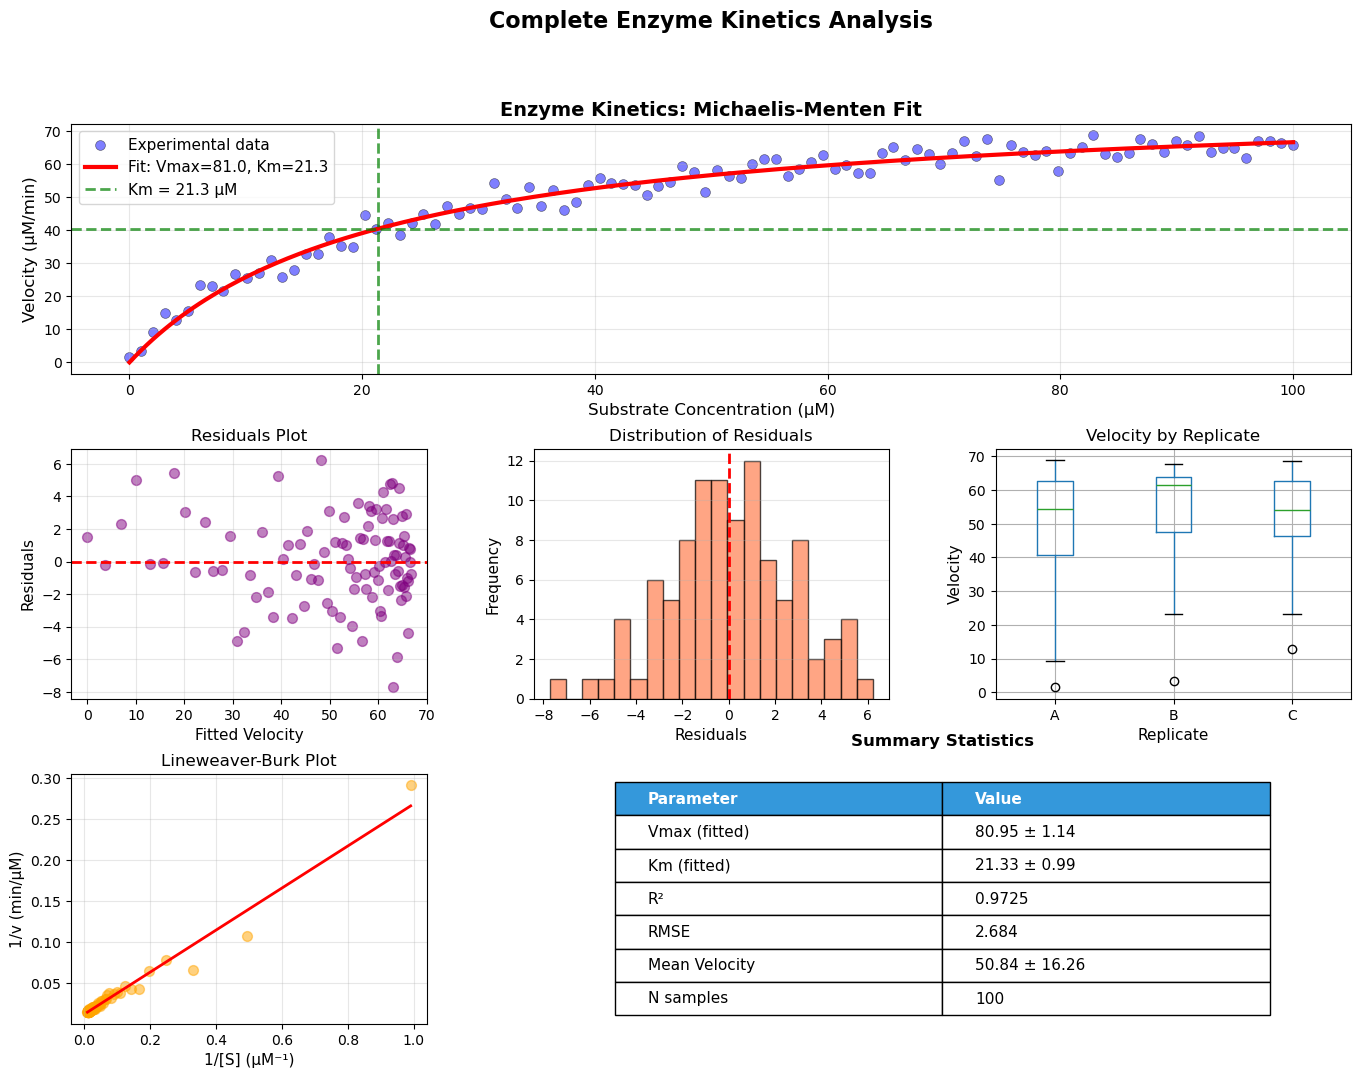

In [27]:
# Step 3: Comprehensive Visualization
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Plot 1: Main kinetics plot with fit
ax1 = fig.add_subplot(gs[0, :])
ax1.scatter(kinetics['Substrate_uM'], kinetics['Velocity'], 
           alpha=0.5, s=50, label='Experimental data', color='blue', edgecolors='black', linewidth=0.5)
substrate_smooth = np.linspace(0, 100, 200)
velocity_smooth = michaelis_menten(substrate_smooth, Vmax_fit, Km_fit)
ax1.plot(substrate_smooth, velocity_smooth, 'r-', linewidth=3, 
        label=f'Fit: Vmax={Vmax_fit:.1f}, Km={Km_fit:.1f}')
ax1.axhline(y=Vmax_fit/2, color='green', linestyle='--', linewidth=2, alpha=0.7, label=f'Km = {Km_fit:.1f} μM')
ax1.axvline(x=Km_fit, color='green', linestyle='--', linewidth=2, alpha=0.7)
ax1.set_xlabel('Substrate Concentration (μM)', fontsize=12)
ax1.set_ylabel('Velocity (μM/min)', fontsize=12)
ax1.set_title('Enzyme Kinetics: Michaelis-Menten Fit', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Residuals plot
ax2 = fig.add_subplot(gs[1, 0])
ax2.scatter(kinetics['Velocity_Fit'], kinetics['Residuals'], alpha=0.5, s=50, color='purple')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Fitted Velocity', fontsize=11)
ax2.set_ylabel('Residuals', fontsize=11)
ax2.set_title('Residuals Plot', fontsize=12)
ax2.grid(True, alpha=0.3)

# Plot 3: Residuals histogram
ax3 = fig.add_subplot(gs[1, 1])
ax3.hist(kinetics['Residuals'], bins=20, color='coral', edgecolor='black', alpha=0.7)
ax3.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Residuals', fontsize=11)
ax3.set_ylabel('Frequency', fontsize=11)
ax3.set_title('Distribution of Residuals', fontsize=12)
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Velocity by Replicate
ax4 = fig.add_subplot(gs[1, 2])
kinetics.boxplot(column='Velocity', by='Replicate', ax=ax4)
ax4.set_xlabel('Replicate', fontsize=11)
ax4.set_ylabel('Velocity', fontsize=11)
ax4.set_title('Velocity by Replicate', fontsize=12)
plt.sca(ax4)
plt.xticks(rotation=0)

# Plot 5: Lineweaver-Burk plot (1/v vs 1/[S])
ax5 = fig.add_subplot(gs[2, 0])
# Remove zero substrate values for Lineweaver-Burk
lb_data = kinetics[kinetics['Substrate_uM'] > 0].copy()
lb_data['1/S'] = 1 / lb_data['Substrate_uM']
lb_data['1/v'] = 1 / lb_data['Velocity']
ax5.scatter(lb_data['1/S'], lb_data['1/v'], alpha=0.5, s=50, color='orange')
# Fit line
lb_fit = np.polyfit(lb_data['1/S'], lb_data['1/v'], 1)
lb_line = np.poly1d(lb_fit)
x_lb = np.linspace(lb_data['1/S'].min(), lb_data['1/S'].max(), 100)
ax5.plot(x_lb, lb_line(x_lb), 'r-', linewidth=2)
ax5.set_xlabel('1/[S] (μM⁻¹)', fontsize=11)
ax5.set_ylabel('1/v (min/μM)', fontsize=11)
ax5.set_title('Lineweaver-Burk Plot', fontsize=12)
ax5.grid(True, alpha=0.3)

# Plot 6: Summary statistics table
ax6 = fig.add_subplot(gs[2, 1:])
ax6.axis('tight')
ax6.axis('off')
summary_data = [
    ['Parameter', 'Value'],
    ['Vmax (fitted)', f'{Vmax_fit:.2f} ± {param_errors[0]:.2f}'],
    ['Km (fitted)', f'{Km_fit:.2f} ± {param_errors[1]:.2f}'],
    ['R²', f'{r_squared:.4f}'],
    ['RMSE', f'{np.sqrt(np.mean(kinetics["Residuals"]**2)):.3f}'],
    ['Mean Velocity', f'{kinetics["Velocity"].mean():.2f} ± {kinetics["Velocity"].std():.2f}'],
    ['N samples', f'{len(kinetics)}'],
]
table = ax6.table(cellText=summary_data, cellLoc='left', loc='center',
                 colWidths=[0.4, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2)
# Style header row
for i in range(2):
    table[(0, i)].set_facecolor('#3498db')
    table[(0, i)].set_text_props(weight='bold', color='white')
ax6.set_title('Summary Statistics', fontsize=12, fontweight='bold', pad=20)

plt.suptitle('Complete Enzyme Kinetics Analysis', fontsize=16, fontweight='bold', y=0.995)
plt.show()

In [28]:
# Step 4: Statistical Analysis
print("Statistical Analysis:")
print("="*60)

# Compare replicates
print("\nVelocity by Replicate:")
for rep in ['A', 'B', 'C']:
    rep_data = kinetics[kinetics['Replicate'] == rep]['Velocity']
    print(f"  Replicate {rep}: {rep_data.mean():.2f} ± {rep_data.std():.2f} (n={len(rep_data)})")

# ANOVA to test if replicates are different
groups = [kinetics[kinetics['Replicate'] == rep]['Velocity'].values 
          for rep in ['A', 'B', 'C']]
f_stat, p_value = stats.f_oneway(*groups)
print(f"\nANOVA test for replicate differences:")
print(f"  F-statistic: {f_stat:.3f}")
print(f"  p-value: {p_value:.4f}")
print(f"  Conclusion: {'Significant difference' if p_value < 0.05 else 'No significant difference'} (α=0.05)")

# Normality test on residuals
stat, p_norm = stats.normaltest(kinetics['Residuals'])
print(f"\nNormality test on residuals:")
print(f"  Test statistic: {stat:.3f}")
print(f"  p-value: {p_norm:.4f}")
print(f"  Residuals are {'normally distributed' if p_norm > 0.05 else 'not normally distributed'} (α=0.05)")

Statistical Analysis:

Velocity by Replicate:
  Replicate A: 48.80 ± 17.50 (n=42)
  Replicate B: 53.91 ± 16.11 (n=25)
  Replicate C: 51.10 ± 14.77 (n=33)

ANOVA test for replicate differences:
  F-statistic: 0.777
  p-value: 0.4625
  Conclusion: No significant difference (α=0.05)

Normality test on residuals:
  Test statistic: 0.545
  p-value: 0.7613
  Residuals are normally distributed (α=0.05)
